In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# create a tensor
n_values = 32
x = tf.linspace(-3.0,3.0,n_values)

In [4]:
# create a session to execute the graph
sess = tf.Session()
result = sess.run(x)

In [5]:
# pass session to eval fn
x.eval(session=sess)

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [7]:
# setup a interactive session if we
# don't want to keep passing the session around
sess.close()
sess = tf.InteractiveSession()

In [8]:
x.eval()

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [10]:
# now a tf.Operation
# we will use our values to create a gaussian distribution
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.negative(tf.pow(x- mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
    (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [11]:
# by default, new operations are added to default graph
assert z.graph is tf.get_default_graph()

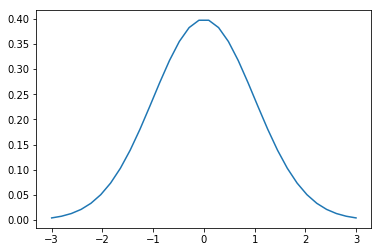

In [12]:
# execute the graph and plot the results
plt.plot(x.eval(),z.eval())
plt.show()

In [13]:
# get tensor shape
print(z.get_shape())

(32,)


In [14]:
print(z.get_shape().as_list())

[32]


In [15]:
# sometime we don't know the shape of the tensor
# until it is computed in the graph. In that case
# we should use tf.Shape fn, which will return a 
# tensor which can be eval'ed, rather than a discrete
# value of tf.dimension
print(tf.shape(z).eval())

[32]


In [17]:
# combining tensors ('pack' has been changed to 'stack')
print(tf.stack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


In [18]:
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

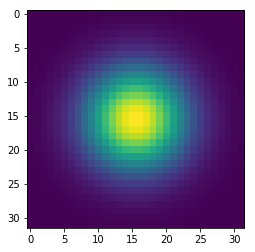

In [19]:
plt.imshow(z_2d.eval())
plt.show()

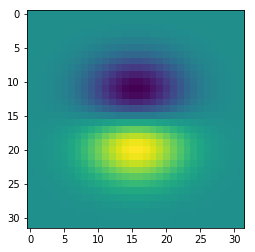

In [21]:
# create a gabor patch
# mul has been changed to multiply
x = tf.reshape(tf.sin(tf.linspace(-3.0,3.0,n_values)), [n_values,1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.multiply(tf.matmul(x,y), z_2d)
plt.imshow(z.eval())
plt.show()

In [22]:
# list of all operations of a graph
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace', 'sub/y', 'sub', 'Pow/y', 'Pow', 'Pow_1/x', 'Pow_1/y', 'Pow_1', 'mul/x', 'mul', 'truediv', 'Neg', 'Exp', 'Sqrt/x', 'Sqrt', 'mul_1/x', 'mul_1', 'truediv_1/x', 'truediv_1', 'mul_2', 'Shape', 'Shape_1', 'Shape_2', 'stack/2_1', 'stack/3_1', 'stack', 'Reshape/shape', 'Reshape', 'Reshape_1/shape', 'Reshape_1', 'MatMul', 'LinSpace_1/start', 'LinSpace_1/stop', 'LinSpace_1/num', 'LinSpace_1', 'Sin', 'Reshape_2/shape', 'Reshape_2', 'ones_like/Shape', 'ones_like/Const', 'ones_like', 'Reshape_3/shape', 'Reshape_3', 'LinSpace_2/start', 'LinSpace_2/stop', 'LinSpace_2/num', 'LinSpace_2', 'Sin_1', 'Reshape_4/shape', 'Reshape_4', 'ones_like_1/Shape', 'ones_like_1/Const', 'ones_like_1', 'Reshape_5/shape', 'Reshape_5', 'MatMul_1', 'Mul']


In [23]:
# creating a generic function for computing the same thing
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0,3.0,n_values)
    z = (tf.exp(tf.negative(tf.pow(x-mean, 2.0) / 
                           (2.0 * tf.pow(sigma,2.0)))) *
        (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values,1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0,3.0,n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.multiply(tf.matmul(x,y), gauss_kernel)
    return gabor_kernel

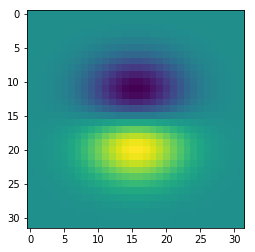

In [24]:
plt.imshow(gabor().eval())
plt.show()